In [1]:
# 📌 STEP 1: Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 📌 STEP 2: Load Dataset
df = pd.read_csv("../datasets/dataset-final.csv", low_memory=False)

# Pilih fitur yang relevan
features = [
    'failed_count_last_5min',
    'failed_ratio_last_5min',
    'unique_user_ids_last_5min'
]

# Gunakan kolom 'attack_type' sebagai label
# Buat label biner: brute_force = 1, lainnya = 0
df['label'] = df['attack_type'].astype(str).apply(lambda x: 1 if x in ["1", "2", "3", "4"] else 0)

X = df[features]
y = df['label']


In [3]:
# 📌 STEP 3: Normalisasi Fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 📌 STEP 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.35, random_state=42, stratify=y
)


In [5]:
# 📌 STEP 5: Training SVM
#model = SVC(kernel='rbf', random_state=42)
model = SGDClassifier(
    loss='hinge',
    #class_weight='balanced',
    class_weight=None,
    max_iter=10000,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
model.fit(X_train, y_train)


-- Epoch 1
Norm: 36.45, NNZs: 3, Bias: -1.667564, T: 650000, Avg. loss: 0.301897
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 36.41, NNZs: 3, Bias: -1.571148, T: 1300000, Avg. loss: 0.273500
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 36.38, NNZs: 3, Bias: -1.578750, T: 1950000, Avg. loss: 0.271952
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 36.36, NNZs: 3, Bias: -1.581386, T: 2600000, Avg. loss: 0.271365
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 36.36, NNZs: 3, Bias: -1.565521, T: 3250000, Avg. loss: 0.271039
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 36.36, NNZs: 3, Bias: -1.590722, T: 3900000, Avg. loss: 0.270808
Total training time: 0.60 seconds.
-- Epoch 7
Norm: 36.36, NNZs: 3, Bias: -1.578393, T: 4550000, Avg. loss: 0.270621
Total training time: 0.70 seconds.
-- Epoch 8
Norm: 36.36, NNZs: 3, Bias: -1.578622, T: 5200000, Avg. loss: 0.270498
Total training time: 0.79 seconds.
Convergence after 8 epochs took 0.79 seconds


SGDClassifier(max_iter=10000, n_jobs=-1, random_state=42, verbose=1)

Confusion Matrix:
[[261739      0]
 [ 56153  32108]]

Classification Report:
              precision    recall  f1-score   support

           0   0.823358  1.000000  0.903123    261739
           1   1.000000  0.363785  0.533493     88261

    accuracy                       0.839563    350000
   macro avg   0.911679  0.681892  0.718308    350000
weighted avg   0.867903  0.839563  0.809912    350000



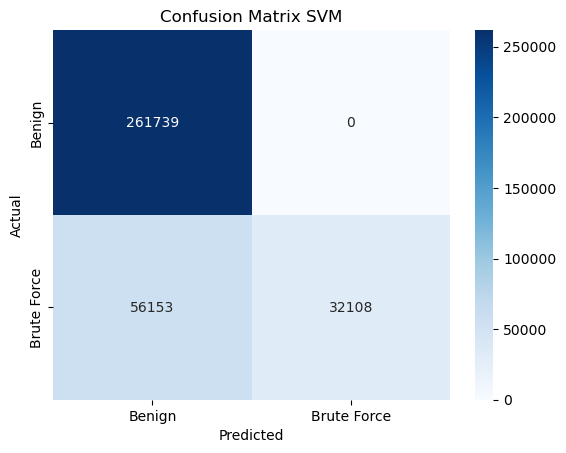

In [6]:
# 📌 STEP 6: Evaluasi Model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

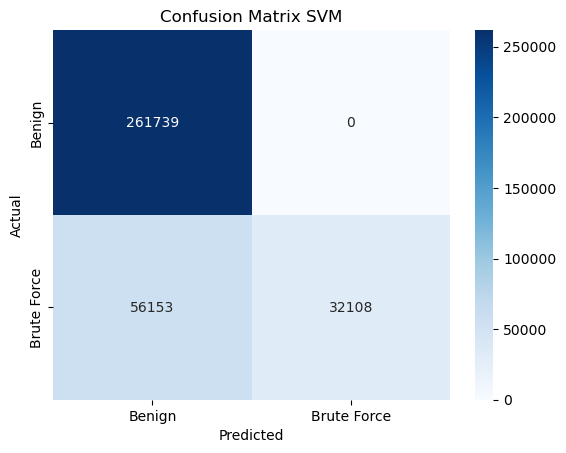

In [7]:
# 📌 (Opsional) Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()


In [8]:
#import joblib

# 📌 STEP 7: Simpan model dan scaler
#joblib.dump(model, "../models/svm_bruteforce_model.pkl")
#joblib.dump(scaler, "../models/svm_scaler_.pkl")
#print("✅ Model dan scaler berhasil disimpan.")
